In [11]:
import pandas as pd      #IMPORTANTE NO OLVIDAR ヽ(•‿ •)ノ
import numpy as np
pd.set_option("display.max_rows", 9) # Especificar el número de filas a mostrar
from scipy import stats # importando scipy.stats
%matplotlib inline
import matplotlib.pyplot as plt # importando matplotlib
from matplotlib.ticker import NullFormatter
import seaborn as sns # importando seaborn
import calendar
plt.style.use('seaborn-whitegrid') # Se define el estilo, en este caso se elige la visualización clásica de Matlab

# Manipulación de datos perdidos

En esta sección se siguen los siguientes pasos:

1. Se cuentan los valores missing, Nan o None utilizando el comando sample, se crea la variable isnull().sum() para contarlo y se observa que no hay datos perdidos.
2. Se cuentan los valores nulos o iguales a cero.
3. Se imputan los valores iguales a cero de acuerdo a la media.

In [12]:
total=pd.read_excel("TOTALULIMPIO1.xlsx",index_col=0) #Recursos:amarillo #Capacidades:rojo #Resultados:azul
total

,ESTABLECIMIENTO,DPTO,CIIU,PERIODO,SOCIOS,PERMANENTE,APRENDIZ,PROD_NAL,PROD_EXT,OBRERO,...,VALORACTIVOS,PROD_BRUTA,PROD_INDUST,INVERBRUTA,TEMPORALDIRECTO,VAL_AGREGADO,MPCOMPRADA,COMPRAS_MP_EXTERIOR,EXPORTACIONES,VENTAS
EMPRESA,,,,,,,,,,,,,,,,,,,,,
145973,145898,11,1810,2008,0,2,0,2,0,10,...,641984,3525900,3525900,0,0,912761,2602400,0,0,3460300
145979,145904,11,1810,2008,2,7,0,0,0,3,...,201817,296411,296411,9406,0,122106,102941,0,0,296411
145987,145912,11,1810,2008,0,0,0,1,0,30,...,143460,1594496,1594496,3200,46,366562,867491,0,194621,1597520
145988,145913,11,1741,2008,1,0,0,2,0,3,...,8704,166200,166200,-2000,0,92868,26720,0,0,231480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987525,987525,8,139,2016,0,0,4,7,0,53,...,6085413,11257778,11907721,25885,84,3431145,4925968,0,654653,11002090
987529,987529,8,139,2016,0,18,1,1,0,24,...,501051,1554335,1566400,0,0,794639,279709,244803,0,1657388
987530,987530,8,139,2016,0,65,3,31,0,512,...,21681651,86282095,85785462,262072,2,22787632,46732723,2530882,49583775,85991402
987533,987533,8,139,2016,0,10,2,6,0,49,...,1603874,7892838,7892838,0,36,3682753,4038309,0,0,8600884


1. Se cuentan los valores perdidos en cada columna y se encuentra que no hay datos perdidos.

In [3]:
total.sample(10) #Contar los valores perdidos en cada columna
missing_values_count = total.isnull().sum()
missing_values_count[0:75] #No hay datos perdidos en ninguna columna

ESTABLECIMIENTO        0
DPTO                   0
CIIU                   0
PERIODO                0
                      ..
MPCOMPRADA             0
COMPRAS_MP_EXTERIOR    0
EXPORTACIONES          0
VENTAS                 0
Length: 65, dtype: int64

2.Se cuentan los valores ceros en cada columna

Después de analizar los histogramas (Ver archivo Histogramas de las variables usadas en la investigación), diagramas de dispersión (Ver archivo Diagramas de dispersión de las variables usadas en la investigación) y los diagramas de cajas (Ver archivo Diagramas de cajas de las variables usadas en la investigación) se evidencia la gran cantidad de ceros que toma cada columna (variable)

In [4]:
# Para contar el número de veces que se presenta un valor en una columna se usa value_counts
total.SOCIOS.value_counts()

0     8779
1     1543
2      939
3      247
      ... 
7        3
6        3
20       1
12       1
Name: SOCIOS, Length: 10, dtype: int64

In [5]:
df = pd.DataFrame(total)   #Contar los valores de todas las columnas
contar=df.apply(pd.Series.value_counts)
contar.loc[[0]] # Se utiliza la función loc para mostrar solo la fila cero

,ESTABLECIMIENTO,DPTO,CIIU,PERIODO,SOCIOS,PERMANENTE,APRENDIZ,PROD_NAL,PROD_EXT,OBRERO,...,PROD_BRUTA,PROD_INDUST,INVERBRUTA,TEMPORALDIRECTO,PERMANENTE.1,VAL_AGREGADO,MPCOMPRADA,COMPRAS_MP_EXTERIOR,EXPORTACIONES,VENTAS
0,NaN,NaN,NaN,NaN,8779.0,2390.0,7079.0,6103.0,11565.0,641.0,...,NaN,NaN,4554.0,6167.0,2390.0,NaN,419.0,9995.0,8674.0,21.0


Al observar la tabla anterior se observa que 26 variables tienen más de 9000 datos en cero y estas variables son:

*Recursos Humanos:* (algunos) PROD_EXT

*Recursos Tangibles físicos:** (algunos) INVER_TERRENO, INVER_EDIF, INVER_EQTRANSP

*Capacidad dinámica de absorción:** (todos) OUTSOURCING_PROD, OUTSOURCING_ADM, TOTAL_OUTSOURCING, COMPRAS_MP_EXTERIOR

*Capacidad estática de marketing operativa:** (4 de 6) MUESTRASGRATIS_PROD, MUESTRASGRATIS_ADM, TOT_MUESTRASGRATIS, PUBLICIDAD_PROD

*Capacidad dinámica de absorción (transformación):** (todos) USO_PATENTES_ADM, TOTALUSO_PATENTES

*Capacidad de innovación:** (todos) GASTOSEDIF_USOPROPIO, GASTOSMAQ_USOPROPIO, GASTOSEINFORMATICA_USOPROPIO, GASTOSEOFICINA_USOPROPIO, GASTOSEQTRANSP_USOPROPIO, TOTALGASTOS_USOPROPIO

*Capacidad tecnológica dinámica:** (algunos) COMPRAEINFORMATICA_USADO, VAL_VENDIDOS_EINFORMATICA

**En total el 53,3% de los datos tienen valor igual a cero**

# 3.Se imputan los valores iguales a cero de acuerdo a la media

Sustitución por la Media. Consiste en sustituir el valor ausente por la Media de los valores válidos. Este procedimiento plantea inconvenientes como:

Dificulta la estimación de la Variáncia.

Distorsiona la verdadera distribución de la variable,

Distorsiona la correlación entre variables dado que añade valores constantes.

Por la manera en que se realiza la sustitución de los datos omitidos, la suma de cuadrados de las desviaciones de las
observaciones respecto de la media permanece inalterada pero se incrementa el tamaño de muestra, lo cual origina que la varianza de la variable disminuya y se generen, en forma artificial, intervalos de confianza más estrechos. 

En caso de que las variables imputadas se utilicen en análisis secundario de datos, se demuestra, por ejemplo, que en los modelos de regresión se alteran los valores de los parámetros estimados, así como su significancia estadística. 

https://repositorio.cepal.org/bitstream/handle/11362/4755/S0700590_es.pdf

https://www.upo.es/revistas/index.php/RevMetCuant/article/download/2120/1689

In [13]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values=0, strategy='mean', axis=0) #Axis=0 para cada columna
totallim=imp.fit_transform(total)


totallimpio= pd.DataFrame(imp.fit_transform(total))
totallimpio.columns = total.columns
totallimpio

,ESTABLECIMIENTO,DPTO,CIIU,PERIODO,SOCIOS,PERMANENTE,APRENDIZ,PROD_NAL,PROD_EXT,OBRERO,...,VALORACTIVOS,PROD_BRUTA,PROD_INDUST,INVERBRUTA,TEMPORALDIRECTO,VAL_AGREGADO,MPCOMPRADA,COMPRAS_MP_EXTERIOR,EXPORTACIONES,VENTAS
0,145898.0,11.0,1810.0,2008.0,1.665038,2.000000,5.370346,2.000000,2.2875,10.0,...,641984.0,3525900.0,3525900.0,343423.189677,79.846659,912761.0,2602400.0,5.155038e+06,4.996960e+06,3460300.0
1,145904.0,11.0,1810.0,2008.0,2.000000,7.000000,5.370346,12.562613,2.2875,3.0,...,201817.0,296411.0,296411.0,9406.000000,79.846659,122106.0,102941.0,5.155038e+06,4.996960e+06,296411.0
2,145912.0,11.0,1810.0,2008.0,1.665038,46.562075,5.370346,1.000000,2.2875,30.0,...,143460.0,1594496.0,1594496.0,3200.000000,46.000000,366562.0,867491.0,5.155038e+06,1.946210e+05,1597520.0
3,145913.0,11.0,1741.0,2008.0,1.000000,46.562075,5.370346,2.000000,2.2875,3.0,...,8704.0,166200.0,166200.0,-2000.000000,79.846659,92868.0,26720.0,5.155038e+06,4.996960e+06,231480.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11641,987525.0,8.0,139.0,2016.0,1.665038,46.562075,4.000000,7.000000,2.2875,53.0,...,6085413.0,11257778.0,11907721.0,25885.000000,84.000000,3431145.0,4925968.0,5.155038e+06,6.546530e+05,11002090.0
11642,987529.0,8.0,139.0,2016.0,1.665038,18.000000,1.000000,1.000000,2.2875,24.0,...,501051.0,1554335.0,1566400.0,343423.189677,79.846659,794639.0,279709.0,2.448030e+05,4.996960e+06,1657388.0
11643,987530.0,8.0,139.0,2016.0,1.665038,65.000000,3.000000,31.000000,2.2875,512.0,...,21681651.0,86282095.0,85785462.0,262072.000000,2.000000,22787632.0,46732723.0,2.530882e+06,4.958378e+07,85991402.0
11644,987533.0,8.0,139.0,2016.0,1.665038,10.000000,2.000000,6.000000,2.2875,49.0,...,1603874.0,7892838.0,7892838.0,343423.189677,36.000000,3682753.0,4038309.0,5.155038e+06,4.996960e+06,8600884.0


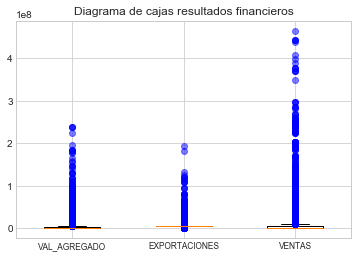

In [17]:
k=plt.boxplot([totallimpio.VAL_AGREGADO,totallimpio.EXPORTACIONES,totallimpio.VENTAS],sym="b+",widths=0.5,whis=1.5)
plt.xticks([1,2,3],["VAL_AGREGADO","EXPORTACIONES","VENTAS"],size="small")
plt.title("Diagrama de cajas resultados financieros");

# visualizar mas fácil los atípicos
for flier in k['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)   # los puntos aislados son valores atípicos

# Datos Atípicos

Un valor atípico es una observación que se aleja demasiado de la moda; esta muy lejos de la tendencia principal del resto de los datos. Pueden ser causados por errores en la recolección de datos o medidas inusuales. Generalmente se recomienda eliminarlos del conjunto de datos. Los diagramas de cajas son una presentación visual que describe varias características importantes al mismo tiempo, tales como la dispersión y simetría. Para su realización se representan los tres cuartiles y los valores mínimo y máximo de los datos, sobre un rectángulo, alineado horizontal o verticalmente. Estos gráficos nos proporcionan abundante información y son sumamente útiles para encontrar valores atípicos y comparar dos conjunto de datos. 

Pasos:

1. Se realiza un gráfico de cajas de las variables de estudio utilizando la función boxplot() Ver archivo Diagramas de caja de variables seleccionadas en la investigación.

2. Se eliminan los datos atípicos eliminando todas las filas que tienen valores atípicos en al menos una columna (FORMA 1) escogiendo los datos que estan dentro de 3 desviaciones estándar de la media

3. Se eliminan los datos atípicos eliminando todas las filas que tienen valores atípicos en al menos una columna (FORMA 2) utilizando el puntaje Z

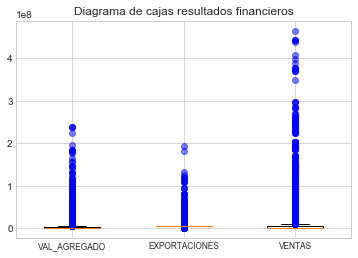

In [18]:
k=plt.boxplot([totallimpio.VAL_AGREGADO,totallimpio.EXPORTACIONES,totallimpio.VENTAS],sym="b+",widths=0.5,whis=1.5)
plt.xticks([1,2,3],["VAL_AGREGADO","EXPORTACIONES","VENTAS"],size="small")
plt.title("Diagrama de cajas resultados financieros");

# visualizar mas fácil los atípicos
for flier in k['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)   # los puntos aislados son valores atípicos
    
plt.savefig("Diagrama de cajas resultados financieros.png")

# Forma 1

Se eliminan los datos atípicos eliminando todas las filas que tienen valores atípicos en al menos una columna escogiendo los datos que estan dentro de 3 desviaciones estándar de la media y obteniendo 9983 filas

In [14]:
from scipy import stats     #Los datos estan dentro de 3 desviaciones estándar de la media
totalfiltrado=totallimpio[(np.abs(stats.zscore(totallimpio)) < 3).all(axis=1)]
totalfiltrado

,ESTABLECIMIENTO,DPTO,CIIU,PERIODO,SOCIOS,PERMANENTE,APRENDIZ,PROD_NAL,PROD_EXT,OBRERO,...,VALORACTIVOS,PROD_BRUTA,PROD_INDUST,INVERBRUTA,TEMPORALDIRECTO,VAL_AGREGADO,MPCOMPRADA,COMPRAS_MP_EXTERIOR,EXPORTACIONES,VENTAS
0,145898.0,11.0,1810.0,2008.0,1.665038,2.000000,5.370346,2.000000,2.2875,10.0,...,641984.0,3525900.0,3525900.0,343423.189677,79.846659,912761.0,2602400.0,5.155038e+06,4.996960e+06,3460300.0
1,145904.0,11.0,1810.0,2008.0,2.000000,7.000000,5.370346,12.562613,2.2875,3.0,...,201817.0,296411.0,296411.0,9406.000000,79.846659,122106.0,102941.0,5.155038e+06,4.996960e+06,296411.0
2,145912.0,11.0,1810.0,2008.0,1.665038,46.562075,5.370346,1.000000,2.2875,30.0,...,143460.0,1594496.0,1594496.0,3200.000000,46.000000,366562.0,867491.0,5.155038e+06,1.946210e+05,1597520.0
3,145913.0,11.0,1741.0,2008.0,1.000000,46.562075,5.370346,2.000000,2.2875,3.0,...,8704.0,166200.0,166200.0,-2000.000000,79.846659,92868.0,26720.0,5.155038e+06,4.996960e+06,231480.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11635,987459.0,8.0,1410.0,2016.0,2.000000,46.562075,3.000000,12.562613,2.2875,27.0,...,188741.0,1290356.0,1290356.0,11182.000000,54.000000,790408.0,618268.0,5.155038e+06,4.996960e+06,1100444.0
11636,987465.0,8.0,1410.0,2016.0,1.665038,40.000000,2.000000,12.562613,2.2875,29.0,...,465071.0,3679414.0,3679414.0,343423.189677,8.000000,1476328.0,2164604.0,5.155038e+06,4.996960e+06,3300208.0
11637,987467.0,8.0,1410.0,2016.0,1.665038,36.000000,12.000000,9.000000,2.2875,260.0,...,2874293.0,15549225.0,15550083.0,503083.000000,400.000000,7454626.0,6940062.0,5.155038e+06,1.608454e+06,15443532.0
11638,987483.0,8.0,1410.0,2016.0,1.000000,3.000000,2.000000,12.562613,2.2875,11.0,...,300842.0,1284882.0,1284882.0,343423.189677,18.000000,835716.0,421689.0,5.155038e+06,1.717450e+05,1180126.0


# Forma 2

Se eliminan los datos atípicos eliminando todas las filas que tienen valores atípicos en al menos una columna utilizando el puntaje Z y obteniendo 9983 filas

El puntaje Z es el número firmado de desviaciones estándar por las cuales el valor de una observación o punto de datos está por encima del valor medio de lo que se está observando o midiendo 

In [15]:
z = np.abs (stats.zscore (totallimpio)) 
z
np.where (z> 3)

(array([   26,    26,    52, ..., 11643, 11643, 11644], dtype=int32),
 array([13, 15,  4, ..., 60, 62,  2], dtype=int32))

In [16]:
total_limpio = totallimpio [(z <3) .all (axis = 1)] 
total_limpio

,ESTABLECIMIENTO,DPTO,CIIU,PERIODO,SOCIOS,PERMANENTE,APRENDIZ,PROD_NAL,PROD_EXT,OBRERO,...,VALORACTIVOS,PROD_BRUTA,PROD_INDUST,INVERBRUTA,TEMPORALDIRECTO,VAL_AGREGADO,MPCOMPRADA,COMPRAS_MP_EXTERIOR,EXPORTACIONES,VENTAS
0,145898.0,11.0,1810.0,2008.0,1.665038,2.000000,5.370346,2.000000,2.2875,10.0,...,641984.0,3525900.0,3525900.0,343423.189677,79.846659,912761.0,2602400.0,5.155038e+06,4.996960e+06,3460300.0
1,145904.0,11.0,1810.0,2008.0,2.000000,7.000000,5.370346,12.562613,2.2875,3.0,...,201817.0,296411.0,296411.0,9406.000000,79.846659,122106.0,102941.0,5.155038e+06,4.996960e+06,296411.0
2,145912.0,11.0,1810.0,2008.0,1.665038,46.562075,5.370346,1.000000,2.2875,30.0,...,143460.0,1594496.0,1594496.0,3200.000000,46.000000,366562.0,867491.0,5.155038e+06,1.946210e+05,1597520.0
3,145913.0,11.0,1741.0,2008.0,1.000000,46.562075,5.370346,2.000000,2.2875,3.0,...,8704.0,166200.0,166200.0,-2000.000000,79.846659,92868.0,26720.0,5.155038e+06,4.996960e+06,231480.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11635,987459.0,8.0,1410.0,2016.0,2.000000,46.562075,3.000000,12.562613,2.2875,27.0,...,188741.0,1290356.0,1290356.0,11182.000000,54.000000,790408.0,618268.0,5.155038e+06,4.996960e+06,1100444.0
11636,987465.0,8.0,1410.0,2016.0,1.665038,40.000000,2.000000,12.562613,2.2875,29.0,...,465071.0,3679414.0,3679414.0,343423.189677,8.000000,1476328.0,2164604.0,5.155038e+06,4.996960e+06,3300208.0
11637,987467.0,8.0,1410.0,2016.0,1.665038,36.000000,12.000000,9.000000,2.2875,260.0,...,2874293.0,15549225.0,15550083.0,503083.000000,400.000000,7454626.0,6940062.0,5.155038e+06,1.608454e+06,15443532.0
11638,987483.0,8.0,1410.0,2016.0,1.000000,3.000000,2.000000,12.562613,2.2875,11.0,...,300842.0,1284882.0,1284882.0,343423.189677,18.000000,835716.0,421689.0,5.155038e+06,1.717450e+05,1180126.0


In [17]:
# Para guardar el Dataframe se utiliza la función to_excel y se especifíca el nombre del archivo

totalfiltrado.to_excel("TOTALULIMPIO2.xlsx")